In [1]:
import pandas as pd
import arviz as az
import numpy as np
import math
import timedelta
import matplotlib
from matplotlib import pyplot as plt

In [2]:
df = pd.read_pickle('events.pkl')
df.head()

,eventInfo,eventType,eventDescription,picks,amplitudes
0,{'publicID': 'smi:nakamura81/event/00001'},earthquake,unclassified deep moonquake,"[{'stationCode': 'S11', 'networkCode': 'XA', '...",[{'publicID': 'smi:nakamura81/amplitude/S11/00...
1,{'publicID': 'smi:nakamura81/event/00002'},meteorite,meteoroid,"[{'stationCode': 'S11', 'networkCode': 'XA', '...",[{'publicID': 'smi:nakamura81/amplitude/S11/00...
2,{'publicID': 'smi:nakamura81/event/00003'},earthquake,deep moonquake,"[{'stationCode': 'S11', 'networkCode': 'XA', '...",[{'publicID': 'smi:nakamura81/amplitude/S11/00...
3,{'publicID': 'smi:nakamura81/event/00004'},meteorite,meteoroid,"[{'stationCode': 'S11', 'networkCode': 'XA', '...",[{'publicID': 'smi:nakamura81/amplitude/S11/00...
4,{'publicID': 'smi:nakamura81/event/00005'},meteorite,meteoroid,"[{'stationCode': 'S11', 'networkCode': 'XA', '...",[{'publicID': 'smi:nakamura81/amplitude/S11/00...


In [3]:
# Select only earthquake events
quakesOnly = df.loc[df['eventDescription'] == 'deep moonquake']
quakesOnly = quakesOnly.reset_index(drop=True)
quakesOnly

,eventInfo,eventType,eventDescription,picks,amplitudes
0,{'publicID': 'smi:nakamura81/event/00003'},earthquake,deep moonquake,"[{'stationCode': 'S11', 'networkCode': 'XA', '...",[{'publicID': 'smi:nakamura81/amplitude/S11/00...
1,{'publicID': 'smi:nakamura81/event/00009'},earthquake,deep moonquake,"[{'stationCode': 'S11', 'networkCode': 'XA', '...",[{'publicID': 'smi:nakamura81/amplitude/S11/00...
2,{'publicID': 'smi:nakamura81/event/00013'},earthquake,deep moonquake,"[{'stationCode': 'S12', 'networkCode': 'XA', '...",[{'publicID': 'smi:nakamura81/amplitude/S12/00...
3,{'publicID': 'smi:nakamura81/event/00015'},earthquake,deep moonquake,"[{'stationCode': 'S12', 'networkCode': 'XA', '...",[{'publicID': 'smi:nakamura81/amplitude/S12/00...
4,{'publicID': 'smi:nakamura81/event/00016'},earthquake,deep moonquake,"[{'stationCode': 'S12', 'networkCode': 'XA', '...",[{'publicID': 'smi:nakamura81/amplitude/S12/00...
...,...,...,...,...,...
7078,{'publicID': 'smi:nakamura81/event/13048'},earthquake,deep moonquake,"[{'stationCode': 'S16', 'networkCode': 'XA', '...",[{'publicID': 'smi:nakamura81/amplitude/S16/13...
7079,{'publicID': 'smi:nakamura81/event/13050'},earthquake,deep moonquake,"[{'stationCode': 'S12', 'networkCode': 'XA', '...",[{'publicID': 'smi:nakamura81/amplitude/S12/13...
7080,{'publicID': 'smi:nakamura81/event/13052'},earthquake,deep moonquake,"[{'stationCode': 'S14', 'networkCode': 'XA', '...",[{'publicID': 'smi:nakamura81/amplitude/S14/13...
7081,{'publicID': 'smi:nakamura81/event/13053'},earthquake,deep moonquake,"[{'stationCode': 'S14', 'networkCode': 'XA', '...",[{'publicID': 'smi:nakamura81/amplitude/S14/13...


In [4]:
# Check how many amplitudes each event has
anone=0
aone=0
atwo=0
athree=0
afour=0
for x in quakesOnly['amplitudes']:
    
    if len(x) == 0:
        anone+=1
    
    if len(x) == 1:
        aone+=1
        
    if len(x) == 2:
        atwo+=1
        
    if len(x) == 3:
        athree+=1
        
    if len(x) == 4:
        afour+=1
print(f'None:{anone}, Unique:{aone}, Two times:{atwo}, Three times:{athree}, Four times:{afour}')
print('Check that sum is 7083: ')
print(anone+aone+atwo+athree+afour)

None:0, Unique:2127, Two times:2503, Three times:1691, Four times:762
Check that sum is 7083: 
7083


In [5]:
# Select only the genericAmplitude dictonary from de df['amplitudes'] list => amplitude value
genericAmplitudes=[]

# Select only the times from each element of the events picks column => time
times=[]

for index, row in quakesOnly.iterrows():
    
    for k in [1,2,3,4]:
        if len(row['amplitudes']) == k:
            s=0
            for element in row['amplitudes']:
                s+=float(element['genericAmplitude'])
            s=s/k
            genericAmplitudes.append(s)

            for element in row['picks']:
                times.append(element['time'])
                break


In [6]:
# Make a new dataframe only with the columns that interests us 
quakes = quakesOnly[['eventType', 'eventDescription']].copy()
quakes['times']= pd.to_datetime(times)
quakes['amplitude'] = genericAmplitudes
quakes = quakes.reset_index(drop=True)
quakes

,eventType,eventDescription,times,amplitude
0,earthquake,deep moonquake,1969-07-28 13:49:00+00:00,3.70
1,earthquake,deep moonquake,1969-08-25 00:30:00+00:00,4.00
2,earthquake,deep moonquake,1969-11-28 03:39:00+00:00,-1.00
3,earthquake,deep moonquake,1969-11-29 09:10:00+00:00,1.00
4,earthquake,deep moonquake,1969-11-29 11:55:00+00:00,1.50
...,...,...,...,...
7078,earthquake,deep moonquake,1977-09-28 00:30:00+00:00,-1.00
7079,earthquake,deep moonquake,1977-09-28 02:23:00+00:00,1.55
7080,earthquake,deep moonquake,1977-09-28 08:13:00+00:00,-1.00
7081,earthquake,deep moonquake,1977-09-28 08:24:00+00:00,-1.00


In [7]:
max(quakes['amplitude'])

33.0

In [8]:
for item in quakes['amplitude']:
    if item>10:
        print(item)

12.0
11.0
11.0
19.25
33.0
11.325
10.85
25.6
19.5


In [9]:
min(quakes['amplitude'])

-1.0

In [10]:
from scipy.optimize import curve_fit

In [11]:
# Power law used to fit the connectivity distribution
def power_law(x, a, b):
    return a*np.power(x, -b)

Text(0.5, 1.0, 'Waiting times histogram - MoonQuakes')

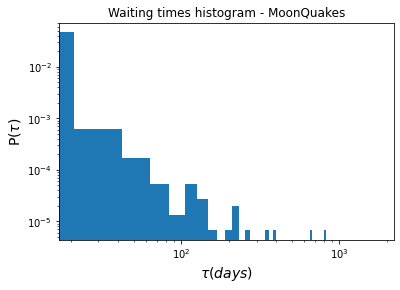

In [12]:
# Waiting Times without delta 
wtid = []

for i in range(len(quakes['amplitude'])):
    if quakes['amplitude'][i]<max(quakes['amplitude']):
        firstEvent = quakes['times'][i]

        for j in range(i+1,len(quakes['amplitude'])):
            if quakes['amplitude'][j]>=quakes['amplitude'][i]:
                secondEvent = quakes['times'][j]
                wtid.append((secondEvent-firstEvent).days)
                if (secondEvent-firstEvent).days < 0:
                    print(secondEvent)
                    print(firstEvent)
                break;


hist, bins, patches = plt.hist(wtid,bins=round(math.sqrt(len(wtid))),density=True) 
plt.xscale('log')
plt.xlabel(r'$\tau(days)$', fontsize=14)
plt.yscale('log')
plt.ylabel(r'P($\tau$)', fontsize=14)
plt.title('Waiting times histogram - MoonQuakes')
#plt.savefig("waitingTimesMoonHistogram.png")

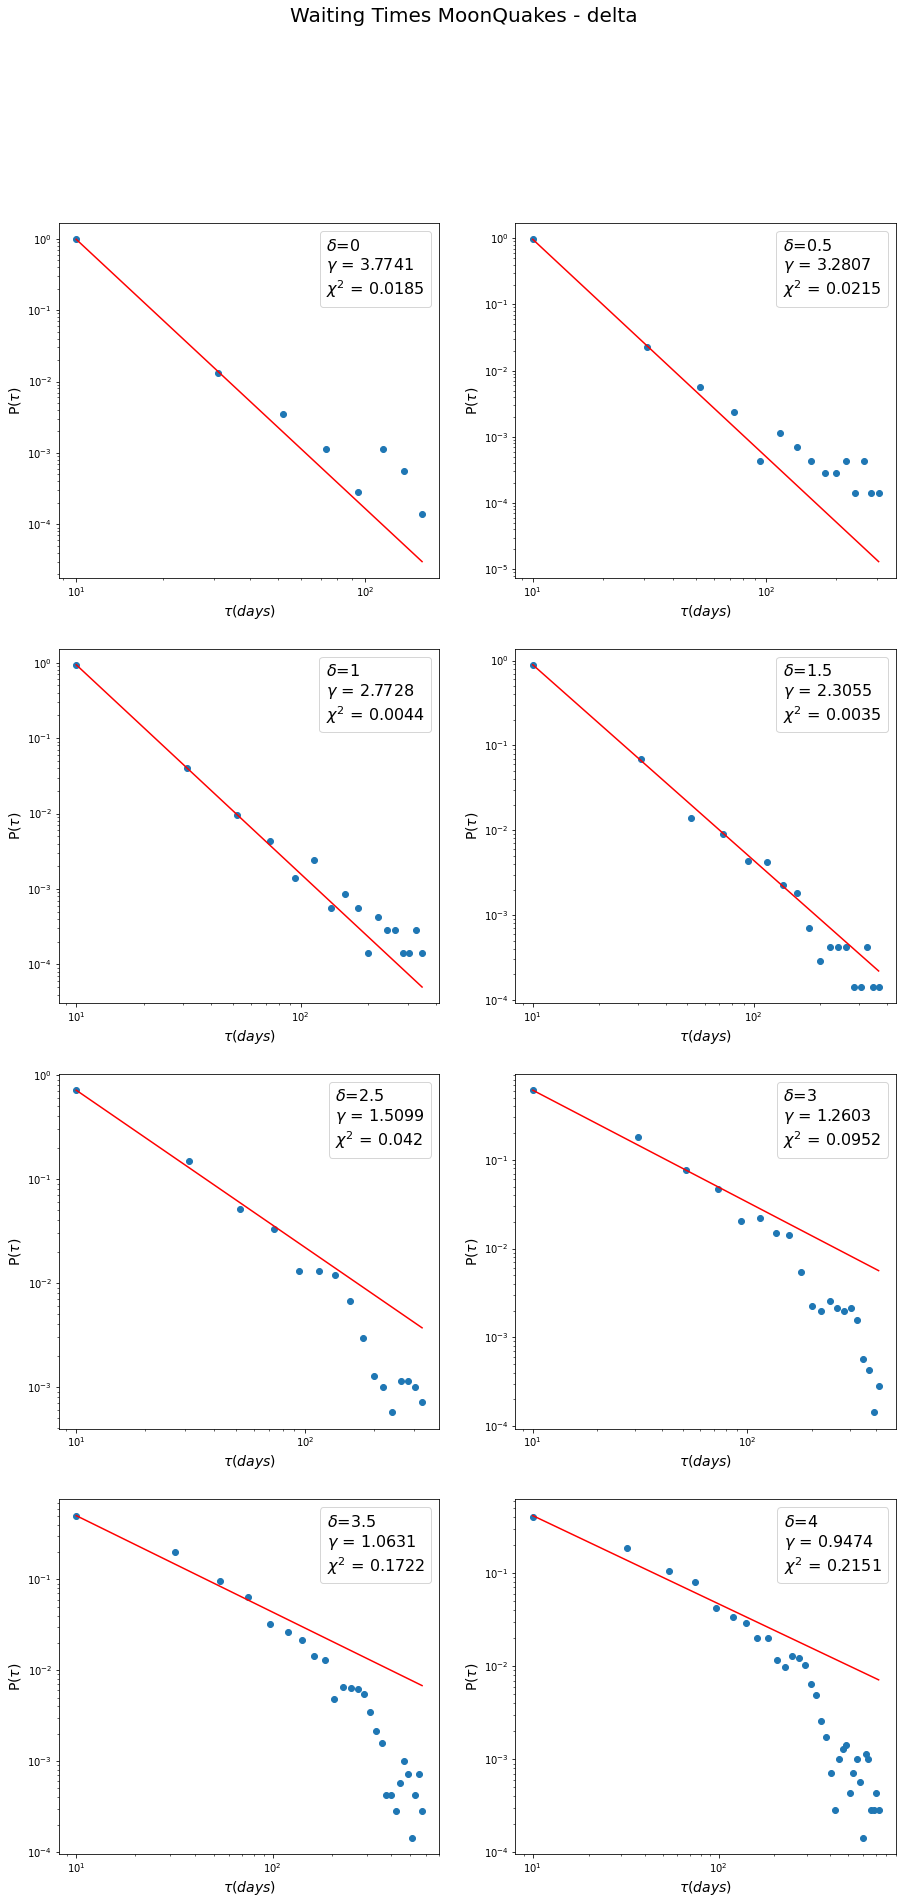

In [37]:
fig, ax = plt.subplots(4, 2, figsize=(15,30))#, sharex=True, sharey=True)

ax = np.ravel(ax)
delta =[0, 0.5, 1, 1.5, 2.5, 3, 3.5, 4]

for k in range(len(delta)):
    wtid = []
    
    for i in range(len(quakes['amplitude'])):
        if quakes['amplitude'][i]<max(quakes['amplitude'])-delta[k]:
            firstEvent = quakes['times'][i]

            for j in range(i+1,len(quakes['amplitude'])):
                if quakes['amplitude'][j]>=quakes['amplitude'][i]+delta[k]:
                    secondEvent = quakes['times'][j]
                    wtid.append((secondEvent-firstEvent).days)
                    break;

    #wtid = waitingTimes2(quakes, delta[i])
    #ax[k].hist(wtid, bins=round(math.sqrt(len(wtid))),density=True)
    
    # Regressions 
    
    hist,bins = np.histogram(wtid, bins=round(math.sqrt(len(wtid))))
    # Create the data x,y from the hist and bins
    # x = bins centers . First create empty array of the length of hist
    x = np.zeros_like(hist)
    # Append to it the centers of the bins
    for i in range(1,len(bins)):
        x[i-1]=((bins[i]+bins[i-1])/2)

    # Check for zeros in the hist list and cut both x and y where the first zero occurs
    for i in range(len(hist)):
        if hist[i]==0:
            y=np.array(hist[:i])
            x=np.array(x[:i])
            break
        # If there is no zeros, make y=hist ( full data is taken into acoount)
        else:
            y=hist

    # Renormalize the ydata to 1 
    y_norm = [float(i)/sum(y) for i in y]

    
    # Compute the power_law fit to our data 
    pars, cov = curve_fit(f=power_law,xdata=x,ydata=y_norm,maxfev=5000)
    # Compute the chi_squared goodness of fit = sum( ( observed - expected )^2 / expected )
    chi_squared = np.sum((y_norm-power_law(x,*pars))**2/power_law(x,*pars))
    
    
    # Connectivity distribution ( data + fit)
    # The data, scattered
    ax[k].scatter(x,y_norm)
    ax[k].set_xscale('log')
    ax[k].set_yscale('log')
    # The fit
    ax[k].plot(x,power_law(x,*pars),
               label=f'$\delta$={delta[k]}\n$\gamma$ = {np.round(pars[1],4)}\n$\chi^2$ = {np.round(chi_squared,4)}',
               color='red')
    
    # Legend : gamma coefficient of fit and chi_squared goodness of fit
    ax[k].legend(handlelength=0, handletextpad=0,loc='upper right',fontsize=16,frameon=True)

    # Title of connectivity distribution ( data + fit )
    ax[k].set_xlabel(r'$\tau(days)$', fontsize=16)
    ax[k].set_ylabel(r'P($\tau$)', fontsize=16);
    
    ax[k].set_xscale('log')
    ax[k].set_yscale('log')
    ax[k].set_xlabel(r'$\tau(days)$', fontsize=14)
    ax[k].set_ylabel(r'P($\tau$)', fontsize=14)


plt.suptitle('Waiting Times MoonQuakes - delta',fontsize=20)
plt.savefig("waitingTimesMoonALL.png")

[   0.           21.70238095   43.4047619    65.10714286   86.80952381
  108.51190476  130.21428571  151.91666667  173.61904762  195.32142857
  217.02380952  238.72619048  260.42857143  282.13095238  303.83333333
  325.53571429  347.23809524  368.94047619  390.64285714  412.3452381
  434.04761905  455.75        477.45238095  499.1547619   520.85714286
  542.55952381  564.26190476  585.96428571  607.66666667  629.36904762
  651.07142857  672.77380952  694.47619048  716.17857143  737.88095238
  759.58333333  781.28571429  802.98809524  824.69047619  846.39285714
  868.0952381   889.79761905  911.5         933.20238095  954.9047619
  976.60714286  998.30952381 1020.01190476 1041.71428571 1063.41666667
 1085.11904762 1106.82142857 1128.52380952 1150.22619048 1171.92857143
 1193.63095238 1215.33333333 1237.03571429 1258.73809524 1280.44047619
 1302.14285714 1323.8452381  1345.54761905 1367.25       1388.95238095
 1410.6547619  1432.35714286 1454.05952381 1475.76190476 1497.46428571
 1519.16

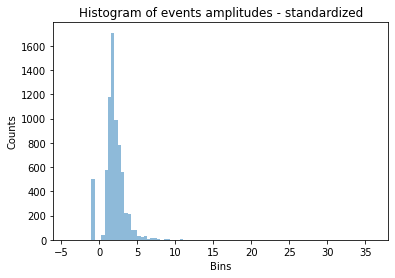

In [38]:
data = genericAmplitudes
print(bins)
#print(type(bins))
bins = np.linspace(math.ceil(min(data)), 
                   math.floor(max(data)),
                   80) # fixed number of bins

plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=bins, alpha=0.5)
plt.title('Histogram of events amplitudes - standardized')
plt.xlabel('Bins')
plt.ylabel('Counts')

plt.savefig('histogram_amplitudes.png');
plt.show()

In [ ]:
# Without -1

In [20]:
#quakes2 = quakes.copy()
#for index,row in quakes.iterrows():
#    if row['amplitude'] < 0:
#        quakes.drop(index, inplace=True)
#        
#quakes = quakes.reset_index(drop=True)
#quakes

,eventType,eventDescription,times,amplitude
0,earthquake,deep moonquake,1969-07-28 13:49:00+00:00,3.700000
1,earthquake,deep moonquake,1969-08-25 00:30:00+00:00,4.000000
2,earthquake,deep moonquake,1969-11-29 09:10:00+00:00,1.000000
3,earthquake,deep moonquake,1969-11-29 11:55:00+00:00,1.500000
4,earthquake,deep moonquake,1969-11-30 03:24:00+00:00,1.500000
...,...,...,...,...
6575,earthquake,deep moonquake,1977-09-26 19:24:00+00:00,1.450000
6576,earthquake,deep moonquake,1977-09-26 23:58:00+00:00,1.633333
6577,earthquake,deep moonquake,1977-09-27 10:39:00+00:00,3.766667
6578,earthquake,deep moonquake,1977-09-28 02:23:00+00:00,1.550000


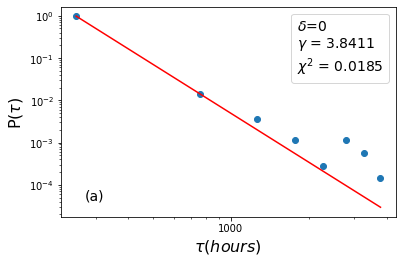

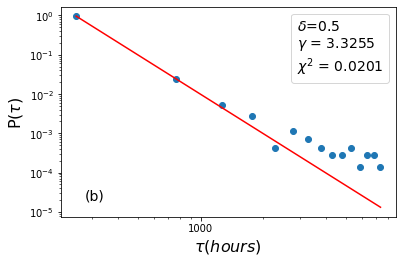

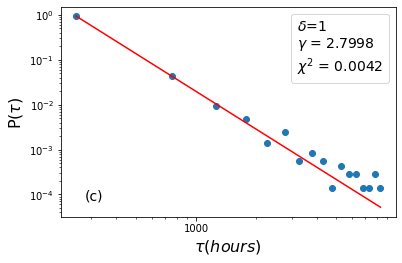

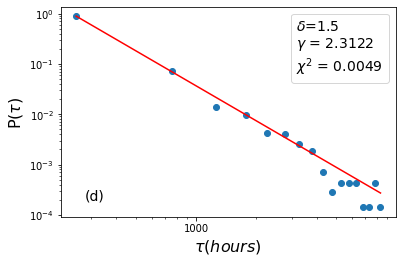

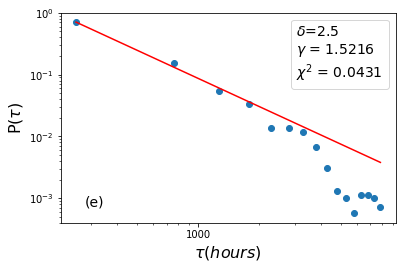

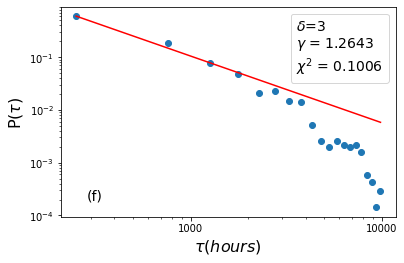

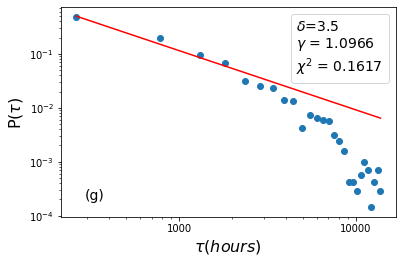

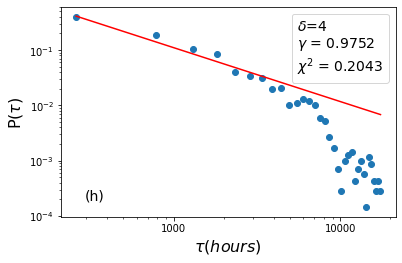

In [13]:
delta = [0, 0.5, 1, 1.5, 2.5, 3, 3.5, 4]
labelss = ['a','b','c','d','e','f','g','h']

for k in range(len(delta)):
    wtid = []

    for i in range(len(quakes['amplitude'])):
        if quakes['amplitude'][i]<max(quakes['amplitude'])-delta[k]:
            firstEvent = quakes['times'][i]

            for j in range(i+1,len(quakes['amplitude'])):
                if quakes['amplitude'][j]>=quakes['amplitude'][i]+delta[k]:
                    secondEvent = quakes['times'][j]
                    wtid.append(timedelta.Timedelta(secondEvent-firstEvent).total.hours)
                    break;
                    
    hist,bins = np.histogram(wtid, bins=round(math.sqrt(len(wtid))))
    # Create the data x,y from the hist and bins
    # x = bins centers . First create empty array of the length of hist
    x = np.zeros_like(hist)
    # Append to it the centers of the bins
    for i in range(1,len(bins)):
        x[i-1]=((bins[i]+bins[i-1])/2)

    # Check for zeros in the hist list and cut both x and y where the first zero occurs
    for i in range(len(hist)):
        if hist[i]==0:
            y=np.array(hist[:i])
            x=np.array(x[:i])
            break
        # If there is no zeros, make y=hist ( full data is taken into acoount)
        else:
            y=hist

    # Renormalize the ydata to 1 
    y_norm = [float(i)/sum(y) for i in y]

    
    # Compute the power_law fit to our data 
    pars, cov = curve_fit(f=power_law,xdata=x,ydata=y_norm,maxfev=5000)
    # Compute the chi_squared goodness of fit = sum( ( observed - expected )^2 / expected )
    chi_squared = np.sum((y_norm-power_law(x,*pars))**2/power_law(x,*pars))
    
    # Connectivity distribution ( data + fit)
    fig = plt.figure()
    ax = fig.add_subplot()

    # The data, scattered
    ax.scatter(x,y_norm)
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    # The fit
    ax.plot(x,power_law(x,*pars),
               label=f'$\delta$={delta[k]}\n$\gamma$ = {np.round(pars[1],4)}\n$\chi^2$ = {np.round(chi_squared,4)}',
               color='red')
    
    # Legend : gamma coefficient of fit and chi_squared goodness of fit
    ax.legend(handlelength=0, handletextpad=0,loc='upper right',fontsize=14,frameon=True)
    
    #plt.text(0.5,0.5,f'{labelss[k]}',fontsize=14)
    ax.text(0.1, 0.1, f'({labelss[k]})',fontsize=14, horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

    # Title of connectivity distribution ( data + fit )
    ax.set_xlabel(r'$\tau(hours)$', fontsize=16)
    ax.set_ylabel(r'P($\tau$)', fontsize=16);
    
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    #ax[k].set_xscale('log')
    #ax[k].set_yscale('log')
    #ax[k].set_xlabel(r'$\tau(days)$', fontsize=14)
    #ax[k].set_ylabel(r'P($\tau$)', fontsize=14)
    plt.gcf().subplots_adjust(bottom=0.15)
    
    plt.savefig(f'waitingTimes_marsDeltas_ALL{labelss[k]}.png')
